# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.067808e+01     8.157027e+00
 * time: 0.0017399787902832031
     1     2.981088e+01     6.508101e+00
 * time: 0.007649898529052734
     2     2.676995e+01     1.139227e+01
 * time: 0.014679908752441406
     3     1.318656e+01     1.894324e+00
 * time: 0.023520946502685547
     4     1.097937e+01     1.576616e+00
 * time: 0.029369831085205078
     5     9.831825e+00     1.018652e+00
 * time: 0.03444194793701172
     6     9.325575e+00     1.680041e+00
 * time: 0.03845477104187012
     7     8.925345e+00     1.256842e+00
 * time: 0.042819976806640625
     8     8.677802e+00     1.025146e+00
 * time: 0.04733681678771973
     9     8.435627e+00     1.146248e+00
 * time: 0.052281856536865234
    10     8.233088e+00     6.176985e-01
 * time: 0.0582578182220459
    11     8.115142e+00     4.700108e-01
 * time: 0.06276488304138184
    12     7.997791e+00     3.116053e-01
 * time: 0.06665396690368652
    13     7.949290e+00     5.805679e-01
 

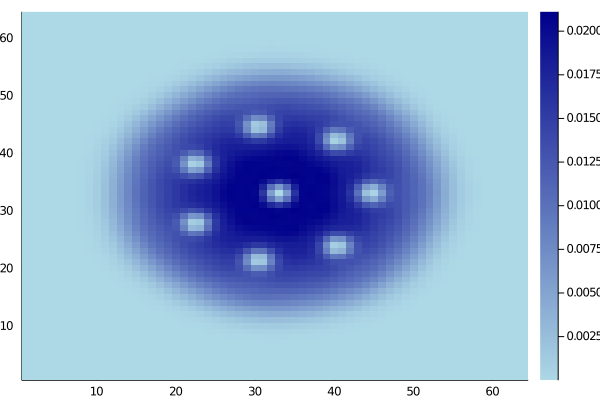

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ.real[:, :, 1], c=:blues)